## Random Forest vs Max Depth

In [4]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import ShuffleSplit

#%%

Xtr = np.genfromtxt("data/X_train.txt",delimiter=None)
Ytr = np.genfromtxt("data/Y_train.txt",delimiter=None)
Xte = np.genfromtxt("data/X_test.txt",delimiter=None)

Xtr,param = ml.transforms.rescale(Xtr)
Xte,_ = ml.transforms.rescale(Xte,param)

X = Xtr[:50000]
Y = Ytr[:50000]

rs0 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
Xsp0 = rs0.split(X)

XtCV = []
XvCV = []
YtCV = []
YvCV = []
for tr_idx, va_idx in Xsp0:
    XtCV.append(X[tr_idx])
    XvCV.append(X[va_idx])
    YtCV.append(Y[tr_idx])
    YvCV.append(Y[va_idx])

errTD = []
errVD = []
D = list(range(1,300,20))
for d in D:
    errti = []
    errvi = []
    for i in range(5):
        rfr = RFR(n_estimators=50,max_depth=d)
        rfr.fit(XtCV[0],YtCV[0])
        YtHat = rfr.predict(XtCV[0])
        YvHat = rfr.predict(XvCV[0])
        errti.append(mse(YtCV[0],YtHat))
        errvi.append(mse(YvCV[0],YvHat))
    errti = np.array(errti)
    errvi = np.array(errvi)
    errTD.append(np.mean(errti))
    errVD.append(np.mean(errvi))

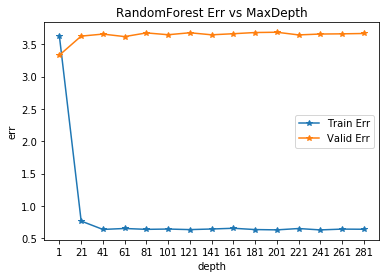

In [5]:
plt.plot(D, errTD,'*-', label='Train Err')
plt.plot(D, errVD,'*-', label='Valid Err')
plt.legend()
plt.title('RandomForest Err vs MaxDepth')
plt.xticks(D,D)
plt.xlabel('depth')
plt.ylabel('err')
plt.savefig('rf_depth',dpi=2000)
plt.show()

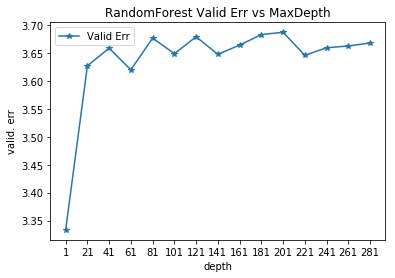

In [6]:
plt.plot(D, errVD,'*-', label='Valid Err')
plt.legend()
plt.title('RandomForest Valid Err vs MaxDepth')
plt.xticks(D,D)
plt.xlabel('depth')
plt.ylabel('valid. err')
plt.savefig('rf_depth_va',dpi=2000)
plt.show()

Max Depth should be around 50

In [10]:
errTD = []
errVD = []
D = list(range(30,55,2))
for d in D:
    errti = []
    errvi = []
    for i in range(5):
        rfr = RFR(n_estimators=50,max_depth=d,max_features=8,min_samples_leaf=8,min_samples_split=132)
        rfr.fit(XtCV[0],YtCV[0])
        YtHat = rfr.predict(XtCV[0])
        YvHat = rfr.predict(XvCV[0])
        errti.append(mse(YtCV[0],YtHat))
        errvi.append(mse(YvCV[0],YvHat))
    errti = np.array(errti)
    errvi = np.array(errvi)
    errTD.append(np.mean(errti))
    errVD.append(np.mean(errvi))

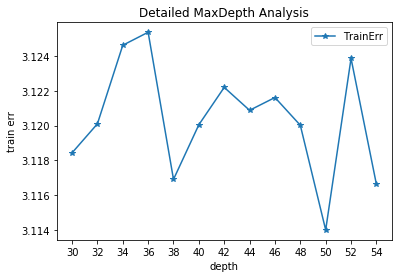

In [14]:
plt.plot(D,errTD,'*-',label='TrainErr')
plt.xticks(D,D)
plt.xlabel('depth')
plt.ylabel('train err')
plt.legend()
plt.title('Detailed MaxDepth Analysis')
plt.show()

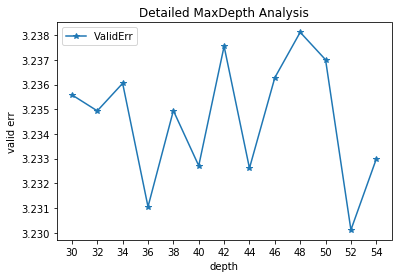

In [15]:
plt.plot(D,errVD,'*-',label='ValidErr')
plt.xticks(D,D)
plt.xlabel('depth')
plt.ylabel('valid err')
plt.legend()
plt.title('Detailed MaxDepth Analysis')
plt.show()